#### 初始化

In [134]:
import matplotlib.pyplot as plt
from PIL import Image
import pickle as pk
import numpy as np
from collections import defaultdict
import time
from res_manager import ResultManager

#### compare_DeepN 

In [6]:
import pickle
with open("result/imagenet_baidu_ref2000.pkl", "rb") as f:
    benchmark = pickle.load(f)
size_list = []
for item in benchmark.values():
    try:
        if item['error_code'] == 0:
            size_list.append(item['ref_size'])
    except Exception as e:
        print(e)

In [7]:
np.mean(size_list)

40917.753006012026

In [9]:
for item in benchmark.values():
    print(item)

{'ref_confidence': 0.943029, 'ref_size': 32319, 'error_code': 0, 'ref_label': '商场'}
{'ref_confidence': 0.608296, 'ref_size': 31280, 'error_code': 0, 'ref_label': '金刚鹦鹉'}
{'ref_confidence': 0.58773, 'ref_size': 33779, 'error_code': 0, 'ref_label': '稻田'}
{'ref_confidence': 0.50669, 'ref_size': 22147, 'error_code': 0, 'ref_label': '水果沙拉'}
{'ref_confidence': 0.39248, 'ref_size': 32534, 'error_code': 0, 'ref_label': '白血病'}
{'ref_confidence': 0.24765, 'ref_size': 12973, 'error_code': 0, 'ref_label': '白菜花'}
{'ref_confidence': 0.509105, 'ref_size': 17567, 'error_code': 0, 'ref_label': '鸟类'}
{'ref_confidence': 0.826137, 'ref_size': 24856, 'error_code': 0, 'ref_label': '美女'}
{'ref_confidence': 0.969304, 'ref_size': 7426, 'error_code': 0, 'ref_label': '卷毛寻回犬'}
{'ref_confidence': 0.607377, 'ref_size': 21976, 'error_code': 0, 'ref_label': '海雕'}
{'ref_confidence': 0.731382, 'ref_size': 80373, 'error_code': 0, 'ref_label': '屏幕截图'}
{'ref_confidence': 0.4522, 'ref_size': 38418, 'error_code': 0, 'ref_la

In [12]:
benchmark_size = np.mean([item['ref_size'] for item in benchmark.values()]) / 1024.
print(benchmark_size)

39.93902392578125


In [24]:
benchmark_size = np.mean([item['ref_size'] for item in benchmark.values()]) / 1024.
# baidu_size = np.mean(baidu_evallog['size_r']) * benchmark_size
# facepp_size = np.mean(facepp_evallog['size_r']) * benchmark_size
# amazon_size = np.mean(amazon_evallog['size_r']) * benchmark_size
baidu_size = 19 
facepp_size = 16
amazon_size = 18

In [18]:
benchmark_acc = 100.0
# baidu_acc = np.mean(np.round(baidu_evallog['acc_r'])) * 100.
# facepp_acc = np.mean(np.round(facepp_evallog['acc_r'])) * 100.
# amazon_acc = np.mean(np.round(amazon_evallog['acc_r'])) * 100.
baidu_acc = np.mean(np.round(0.926)) * 100.
facepp_acc = np.mean(np.round(0.941)) * 100.
amazon_acc = np.mean(np.round(0.912)) * 100.

In [13]:
%matplotlib qt5

In [14]:
%matplotlib inline

In [15]:
font={'family':'sans-serif',
#      'style':'italic',
#     'weight':'bold',
#       'color':'red',
#       'size':16
}

Text(0, 0.5, 'Relative Accuracy (%)')

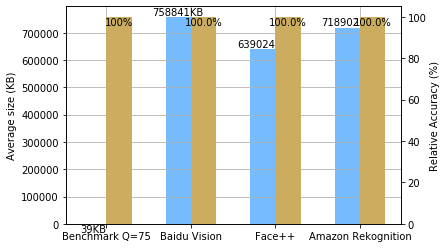

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
b11 = ax.bar([1-0.15], [benchmark_size], width=0.3, color='#75bbfd')
ax.text(1-0.15, benchmark_size, "%dKB" % benchmark_size, ha='center', va='top')
b12 = ax.bar([2-0.15], [baidu_size], width=0.3, color='#75bbfd')
ax.text(2-0.15, baidu_size, "%dKB" % baidu_size, ha='center', va='bottom')
b13 = ax.bar([3-0.15], [facepp_size], width=0.3, color='#75bbfd')
ax.text(3-0.15, facepp_size, "%dKB" % facepp_size, ha='center', va='bottom')
b14 = ax.bar([4-0.15], [amazon_size], width=0.3, color='#75bbfd')
ax.text(4-0.15, amazon_size, "%dKB" % amazon_size, ha='center', va='bottom')
ax.set_ylabel("Average size (KB)", fontdict=font)
# ax.set_ylim(0, 45)


ax.grid()
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["Benchmark Q=75", "Baidu Vision", "Face++", "Amazon Rekognition"], fontdict=font)

ax2 = ax.twinx()
b21 = ax2.bar([1+0.15], [benchmark_acc], label='Average Accuracy', width=0.3, color='#ccad60')
ax2.text(1+0.15, benchmark_acc, "%d%%" % benchmark_acc, ha='center', va='top')
b21 = ax2.bar([2+0.15], [baidu_acc], label='Average Accuracy', width=0.3, color='#ccad60')
ax2.text(2+0.15, baidu_acc, "%.1f%%" % baidu_acc, ha='center', va='top')
b21 = ax2.bar([3+0.15], [facepp_acc], label='Average Accuracy', width=0.3, color='#ccad60')
ax2.text(3+0.15, facepp_acc, "%.1f%%" % facepp_acc, ha='center', va='top')
b21 = ax2.bar([4+0.15], [amazon_acc], label='Average Accuracy', width=0.3, color='#ccad60')
ax2.text(4+0.15, amazon_acc, "%.1f%%" % amazon_acc, ha='center', va='top')
ax2.set_ylabel("Relative Accuracy (%)", fontdict=font)
# ax2.set_ylim(80, 110)



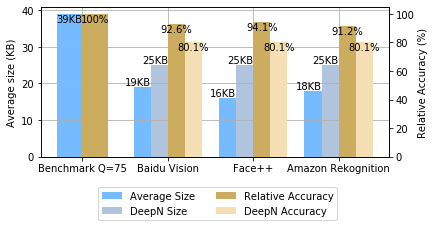

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111)

benchmark_size = 39
baidu_size = 19 
facepp_size = 16
amazon_size = 18

benchmark_acc = 100
baidu_acc = 0.926 * 100.
facepp_acc = 0.941 * 100.
amazon_acc = 0.912 * 100.

ada_size_color = '#75bbfd'
ada_acc_color = '#ccad60'
deep_size_color = 'lightsteelblue'
deep_acc_color = 'wheat'

b11 = ax.bar([1-0.15], [benchmark_size], width=0.3, color=ada_size_color)
ax.text(1-0.15, benchmark_size, "%dKB" % benchmark_size, ha='center', va='top')

b12 = ax.bar([2-0.3], [baidu_size], width=0.2, color=ada_size_color)
ax.text(2-0.35, baidu_size, "%dKB" % baidu_size, ha='center', va='bottom')
baidu_size = 25
c12 = ax.bar([2-0.1], [baidu_size], width=0.2, color=deep_size_color)
ax.text(2-0.15, baidu_size, "%dKB" % baidu_size, ha='center', va='bottom')

b12 = ax.bar([3-0.3], [facepp_size], width=0.2, color=ada_size_color)
ax.text(3-0.35, facepp_size, "%dKB" % facepp_size, ha='center', va='bottom')
facepp_size = 25
c12 = ax.bar([3-0.1], [facepp_size], width=0.2, color=deep_size_color)
ax.text(3-0.15, facepp_size, "%dKB" % facepp_size, ha='center', va='bottom')

b12 = ax.bar([4-0.3], [amazon_size], width=0.2, color=ada_size_color)
ax.text(4-0.35, amazon_size, "%dKB" % amazon_size, ha='center', va='bottom')
amazon_size = 25
c12 = ax.bar([4-0.1], [amazon_size], width=0.2, color=deep_size_color)
ax.text(4-0.15, amazon_size, "%dKB" % amazon_size, ha='center', va='bottom')
ax.set_ylabel("Average size (KB)", fontdict=font)

ax.grid()
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["Benchmark Q=75", "Baidu Vision", "Face++", "Amazon Rekognition"], fontdict=font)

ax2 = ax.twinx()

b21 = ax2.bar([1+0.15], [benchmark_acc], label='Average Accuracy', width=0.3, color=ada_acc_color)
ax2.text(1+0.15, benchmark_acc, "%d%%" % benchmark_acc, ha='center', va='top')

b21 = ax2.bar([2+0.1], [baidu_acc], label='Average Accuracy', width=0.2, color=ada_acc_color)
ax2.text(2+0.1, baidu_acc, "%.1f%%" % baidu_acc, ha='center', va='top')
baidu_acc = 80.1
c21 = ax2.bar([2+0.3], [baidu_acc], label='Average Accuracy', width=0.2, color=deep_acc_color)
ax2.text(2+0.3, baidu_acc, "%.1f%%" % baidu_acc, ha='center', va='top')

b21 = ax2.bar([3+0.1], [facepp_acc], label='Average Accuracy', width=0.2, color=ada_acc_color)
ax2.text(3+0.1, facepp_acc, "%.1f%%" % facepp_acc, ha='center', va='top')
facepp_acc = 80.1
c21 = ax2.bar([3+0.3], [facepp_acc], label='Average Accuracy', width=0.2, color=deep_acc_color)
ax2.text(3+0.3, facepp_acc, "%.1f%%" % facepp_acc, ha='center', va='top')

b21 = ax2.bar([4+0.1], [amazon_acc], label='Average Accuracy', width=0.2, color=ada_acc_color)
ax2.text(4+0.1, amazon_acc, "%.1f%%" % amazon_acc, ha='center', va='top')
amazon_acc = 80.1
c21 = ax2.bar([4+0.3], [amazon_acc], label='Average Accuracy', width=0.2, color=deep_acc_color)
ax2.text(4+0.3, amazon_acc, "%.1f%%" % amazon_acc, ha='center', va='top')

ax2.set_ylabel("Relative Accuracy (%)", fontdict=font)
# ax2.set_ylim(80, 110)

# fig.legend([b11, b21], ["Average Size", "Relative Accuracy"], loc=8, ncol=2)
fig.legend([b11, c12, b21, c21], ["Average Size","DeepN Size", "Relative Accuracy","DeepN Accuracy"], loc=8, ncol=2)
plt.subplots_adjust(top=0.75,
                    bottom=0.23,
                    left=0.105,
                    right=0.91,
                    hspace=0.2,
                    wspace=0.2)
plt.show()

#### 最终画图代码(一张图一个Q表)

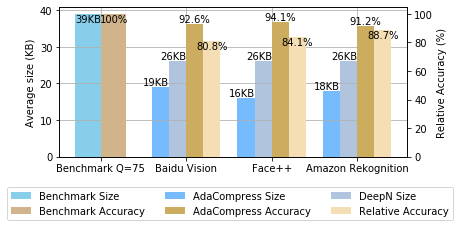

In [135]:
fig = plt.figure()
ax = fig.add_subplot(111)

benchmark_size = 39
baidu_size = 19 
facepp_size = 16
amazon_size = 18
deep_size = 39*(2/3)

benchmark_acc = 100
baidu_acc = 0.926 * 100.
facepp_acc = 0.941 * 100.
amazon_acc = 0.912 * 100.

ada_size_color = '#75bbfd'
ada_acc_color = '#ccad60'
deep_size_color = 'lightsteelblue'
deep_acc_color = 'wheat'

# b11 = ax.bar([1-0.15], [benchmark_size], width=0.3, color='dodgerblue')
b11 = ax.bar([1-0.15], [benchmark_size], width=0.3, color='skyblue')
ax.text(1-0.15, benchmark_size, "%dKB" % benchmark_size, ha='center', va='top')

b12 = ax.bar([2-0.3], [baidu_size], width=0.2, color=ada_size_color)
ax.text(2-0.35, baidu_size, "%dKB" % baidu_size, ha='center', va='bottom')
baidu_size = deep_size
c12 = ax.bar([2-0.1], [baidu_size], width=0.2, color=deep_size_color)
ax.text(2-0.15, baidu_size, "%dKB" % baidu_size, ha='center', va='bottom')

b12 = ax.bar([3-0.3], [facepp_size], width=0.2, color=ada_size_color)
ax.text(3-0.35, facepp_size, "%dKB" % facepp_size, ha='center', va='bottom')
facepp_size = deep_size
c12 = ax.bar([3-0.1], [facepp_size], width=0.2, color=deep_size_color)
ax.text(3-0.15, facepp_size, "%dKB" % facepp_size, ha='center', va='bottom')

b12 = ax.bar([4-0.3], [amazon_size], width=0.2, color=ada_size_color)
ax.text(4-0.35, amazon_size, "%dKB" % amazon_size, ha='center', va='bottom')
amazon_size = deep_size
c12 = ax.bar([4-0.1], [amazon_size], width=0.2, color=deep_size_color)
ax.text(4-0.15, amazon_size, "%dKB" % amazon_size, ha='center', va='bottom')

ax.grid()
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["Benchmark Q=75", "Baidu Vision", "Face++", "Amazon Rekognition"], fontdict=font)

ax2 = ax.twinx()

b22 = ax2.bar([1+0.15], [benchmark_acc], label='Average Accuracy', width=0.3, color='tan')
ax2.text(1+0.15, benchmark_acc, "%d%%" % benchmark_acc, ha='center', va='top')

b21 = ax2.bar([2+0.1], [baidu_acc], label='Average Accuracy', width=0.2, color=ada_acc_color)
ax2.text(2+0.1, baidu_acc, "%.1f%%" % baidu_acc, ha='center', va='bottom')
baidu_acc = 80.8
c21 = ax2.bar([2+0.3], [baidu_acc], label='Average Accuracy', width=0.2, color=deep_acc_color)
ax2.text(2+0.3, baidu_acc, "%.1f%%" % baidu_acc, ha='center', va='top')

b21 = ax2.bar([3+0.1], [facepp_acc], label='Average Accuracy', width=0.2, color=ada_acc_color)
ax2.text(3+0.1, facepp_acc, "%.1f%%" % facepp_acc, ha='center', va='bottom')
facepp_acc = 84.1
c21 = ax2.bar([3+0.3], [facepp_acc], label='Average Accuracy', width=0.2, color=deep_acc_color)
ax2.text(3+0.3, facepp_acc, "%.1f%%" % facepp_acc, ha='center', va='top')

b21 = ax2.bar([4+0.1], [amazon_acc], label='Average Accuracy', width=0.2, color=ada_acc_color)
ax2.text(4+0.1, amazon_acc, "%.1f%%" % amazon_acc, ha='center', va='bottom')
amazon_acc = 88.7
c21 = ax2.bar([4+0.3], [amazon_acc], label='Average Accuracy', width=0.2, color=deep_acc_color)
ax2.text(4+0.3, amazon_acc, "%.1f%%" % amazon_acc, ha='center', va='top')

ax.set_ylabel("Average size (KB)", fontdict=font)
# ax.set_ylim(0, 39)
ax2.set_ylabel("Relative Accuracy (%)", fontdict=font)
# ax2.set_ylim(0, 100.)

# fig.legend([b11, b21], ["Average Size", "Relative Accuracy"], loc=8, ncol=2)
fig.legend([b11, b22, b12, b21, c12, c21], ["Benchmark Size","Benchmark Accuracy","AdaCompress Size","AdaCompress Accuracy","DeepN Size","Relative Accuracy","DeepN Accuracy"], loc=8, ncol=3)
plt.subplots_adjust(top=0.75,
                    bottom=0.23,
                    left=0.105,
                    right=0.91,
                    hspace=0.2,
                    wspace=0.2)
plt.show()

#### 最终画图代码(固定Q表)

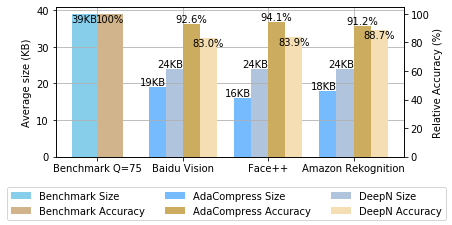

In [138]:
fig = plt.figure()
ax = fig.add_subplot(111)

benchmark_size = 39
baidu_size = 19 
facepp_size = 16
amazon_size = 18
deep_size = 24

benchmark_acc = 100
baidu_acc = 0.926 * 100.
facepp_acc = 0.941 * 100.
amazon_acc = 0.912 * 100.

ada_size_color = '#75bbfd'
ada_acc_color = '#ccad60'
deep_size_color = 'lightsteelblue'
deep_acc_color = 'wheat'

# b11 = ax.bar([1-0.15], [benchmark_size], width=0.3, color='dodgerblue')
b11 = ax.bar([1-0.15], [benchmark_size], width=0.3, color='skyblue')
ax.text(1-0.15, benchmark_size, "%dKB" % benchmark_size, ha='center', va='top')

b12 = ax.bar([2-0.3], [baidu_size], width=0.2, color=ada_size_color)
ax.text(2-0.35, baidu_size, "%dKB" % baidu_size, ha='center', va='bottom')
baidu_size = deep_size
c12 = ax.bar([2-0.1], [baidu_size], width=0.2, color=deep_size_color)
ax.text(2-0.15, baidu_size, "%dKB" % baidu_size, ha='center', va='bottom')

b12 = ax.bar([3-0.3], [facepp_size], width=0.2, color=ada_size_color)
ax.text(3-0.35, facepp_size, "%dKB" % facepp_size, ha='center', va='bottom')
facepp_size = deep_size
c12 = ax.bar([3-0.1], [facepp_size], width=0.2, color=deep_size_color)
ax.text(3-0.15, facepp_size, "%dKB" % facepp_size, ha='center', va='bottom')

b12 = ax.bar([4-0.3], [amazon_size], width=0.2, color=ada_size_color)
ax.text(4-0.35, amazon_size, "%dKB" % amazon_size, ha='center', va='bottom')
amazon_size = deep_size
c12 = ax.bar([4-0.1], [amazon_size], width=0.2, color=deep_size_color)
ax.text(4-0.15, amazon_size, "%dKB" % amazon_size, ha='center', va='bottom')

ax.grid()
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["Benchmark Q=75", "Baidu Vision", "Face++", "Amazon Rekognition"], fontdict=font)

ax2 = ax.twinx()

b22 = ax2.bar([1+0.15], [benchmark_acc], label='Average Accuracy', width=0.3, color='tan')
ax2.text(1+0.15, benchmark_acc, "%d%%" % benchmark_acc, ha='center', va='top')

b21 = ax2.bar([2+0.1], [baidu_acc], label='Average Accuracy', width=0.2, color=ada_acc_color)
ax2.text(2+0.1, baidu_acc, "%.1f%%" % baidu_acc, ha='center', va='bottom')
baidu_acc = 83.0
c21 = ax2.bar([2+0.3], [baidu_acc], label='Average Accuracy', width=0.2, color=deep_acc_color)
ax2.text(2+0.3, baidu_acc, "%.1f%%" % baidu_acc, ha='center', va='top')

b21 = ax2.bar([3+0.1], [facepp_acc], label='Average Accuracy', width=0.2, color=ada_acc_color)
ax2.text(3+0.1, facepp_acc, "%.1f%%" % facepp_acc, ha='center', va='bottom')
facepp_acc = 83.9
c21 = ax2.bar([3+0.3], [facepp_acc], label='Average Accuracy', width=0.2, color=deep_acc_color)
ax2.text(3+0.3, facepp_acc, "%.1f%%" % facepp_acc, ha='center', va='top')

b21 = ax2.bar([4+0.1], [amazon_acc], label='Average Accuracy', width=0.2, color=ada_acc_color)
ax2.text(4+0.1, amazon_acc, "%.1f%%" % amazon_acc, ha='center', va='bottom')
amazon_acc = 88.7
c21 = ax2.bar([4+0.3], [amazon_acc], label='Average Accuracy', width=0.2, color=deep_acc_color)
ax2.text(4+0.3, amazon_acc, "%.1f%%" % amazon_acc, ha='center', va='top')

ax.set_ylabel("Average size (KB)", fontdict=font)
# ax.set_ylim(0, 39)
ax2.set_ylabel("Relative Accuracy (%)", fontdict=font)
# ax2.set_ylim(0, 100.)

# fig.legend([b11, b21], ["Average Size", "Relative Accuracy"], loc=8, ncol=2)
fig.legend([b11, b22, b12, b21, c12, c21], ["Benchmark Size","Benchmark Accuracy","AdaCompress Size","AdaCompress Accuracy","DeepN Size","DeepN Accuracy"], loc=8, ncol=3)
plt.subplots_adjust(top=0.75,
                    bottom=0.23,
                    left=0.105,
                    right=0.91,
                    hspace=0.2,
                    wspace=0.2)
plt.show()

#### 重新计算deepn的压缩大小

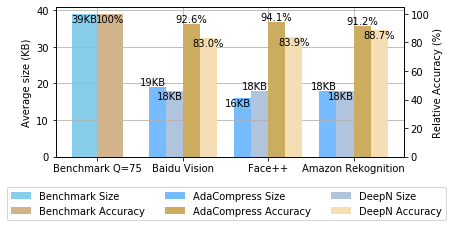

In [142]:
fig = plt.figure()
ax = fig.add_subplot(111)

benchmark_size = 39
baidu_size = 19 
facepp_size = 16
amazon_size = 18
deep_size = 18

benchmark_acc = 100
baidu_acc = 0.926 * 100.
facepp_acc = 0.941 * 100.
amazon_acc = 0.912 * 100.

ada_size_color = '#75bbfd'
ada_acc_color = '#ccad60'
deep_size_color = 'lightsteelblue'
deep_acc_color = 'wheat'

# b11 = ax.bar([1-0.15], [benchmark_size], width=0.3, color='dodgerblue')
b11 = ax.bar([1-0.15], [benchmark_size], width=0.3, color='skyblue')
ax.text(1-0.15, benchmark_size, "%dKB" % benchmark_size, ha='center', va='top')

b12 = ax.bar([2-0.3], [baidu_size], width=0.2, color=ada_size_color)
ax.text(2-0.35, baidu_size, "%dKB" % baidu_size, ha='center', va='bottom')
baidu_size = deep_size
c12 = ax.bar([2-0.1], [baidu_size], width=0.2, color=deep_size_color)
ax.text(2-0.15, baidu_size, "%dKB" % baidu_size, ha='center', va='top')

b12 = ax.bar([3-0.3], [facepp_size], width=0.2, color=ada_size_color)
ax.text(3-0.35, facepp_size, "%dKB" % facepp_size, ha='center', va='top')
facepp_size = deep_size
c12 = ax.bar([3-0.1], [facepp_size], width=0.2, color=deep_size_color)
ax.text(3-0.15, facepp_size, "%dKB" % facepp_size, ha='center', va='bottom')

b12 = ax.bar([4-0.3], [amazon_size], width=0.2, color=ada_size_color)
ax.text(4-0.35, amazon_size, "%dKB" % amazon_size, ha='center', va='bottom')
amazon_size = deep_size
c12 = ax.bar([4-0.1], [amazon_size], width=0.2, color=deep_size_color)
ax.text(4-0.15, amazon_size, "%dKB" % amazon_size, ha='center', va='top')

ax.grid()
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["Benchmark Q=75", "Baidu Vision", "Face++", "Amazon Rekognition"], fontdict=font)

ax2 = ax.twinx()

b22 = ax2.bar([1+0.15], [benchmark_acc], label='Average Accuracy', width=0.3, color='tan')
ax2.text(1+0.15, benchmark_acc, "%d%%" % benchmark_acc, ha='center', va='top')

b21 = ax2.bar([2+0.1], [baidu_acc], label='Average Accuracy', width=0.2, color=ada_acc_color)
ax2.text(2+0.1, baidu_acc, "%.1f%%" % baidu_acc, ha='center', va='bottom')
baidu_acc = 83.0
c21 = ax2.bar([2+0.3], [baidu_acc], label='Average Accuracy', width=0.2, color=deep_acc_color)
ax2.text(2+0.3, baidu_acc, "%.1f%%" % baidu_acc, ha='center', va='top')

b21 = ax2.bar([3+0.1], [facepp_acc], label='Average Accuracy', width=0.2, color=ada_acc_color)
ax2.text(3+0.1, facepp_acc, "%.1f%%" % facepp_acc, ha='center', va='bottom')
facepp_acc = 83.9
c21 = ax2.bar([3+0.3], [facepp_acc], label='Average Accuracy', width=0.2, color=deep_acc_color)
ax2.text(3+0.3, facepp_acc, "%.1f%%" % facepp_acc, ha='center', va='top')

b21 = ax2.bar([4+0.1], [amazon_acc], label='Average Accuracy', width=0.2, color=ada_acc_color)
ax2.text(4+0.1, amazon_acc, "%.1f%%" % amazon_acc, ha='center', va='bottom')
amazon_acc = 88.7
c21 = ax2.bar([4+0.3], [amazon_acc], label='Average Accuracy', width=0.2, color=deep_acc_color)
ax2.text(4+0.3, amazon_acc, "%.1f%%" % amazon_acc, ha='center', va='top')

ax.set_ylabel("Average size (KB)", fontdict=font)
# ax.set_ylim(0, 39)
ax2.set_ylabel("Relative Accuracy (%)", fontdict=font)
# ax2.set_ylim(0, 100.)

# fig.legend([b11, b21], ["Average Size", "Relative Accuracy"], loc=8, ncol=2)
fig.legend([b11, b22, b12, b21, c12, c21], ["Benchmark Size","Benchmark Accuracy","AdaCompress Size","AdaCompress Accuracy","DeepN Size","DeepN Accuracy"], loc=8, ncol=3)
plt.subplots_adjust(top=0.75,
                    bottom=0.23,
                    left=0.105,
                    right=0.91,
                    hspace=0.2,
                    wspace=0.2)
plt.show()